<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/2004_2021_resenha_EPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa de análise e limpeza de dados

Preparando dados da Resenha Mensal EPE 
por: Leandro Barbosa

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
from statsmodels.tsa.seasonal       import seasonal_decompose
stl = style.available
%matplotlib inline

In [2]:
#urlEPE = '/tmp/MERCADO MENSAL PARA DOWNLOAD COLADO.xls'
urlEPE = 'https://docs.google.com/uc?export=download&id=1FtYlt2iaradp5iEebKrWY3mLezRSSqRI'
#https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/Consumo-mensal-de-energia-eletrica-por-classe-regioes-e-subsistemas

In [34]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})

In [3]:
mapmes = {'JAN':'01', 'FEV':'02', 'MAR':'03', 'ABR':'04', 'MAI':'05', 'JUN':'06',
    'JUL':'07', 'AGO':'08', 'SET':'09', 'OUT':'10', 'NOV':'11', 'DEZ':'12'}

lista_setor = ['Residencial', 'Industrial', 'Comercial', 'Outros']

In [4]:
def df_ano_epe( sheet_name, Setor, s):
    df = pd.read_excel(urlEPE, sheet_name=sheet_name,skiprows=4,usecols=None)
    try:
        df.iloc[0+16*s:1+16*s,:]= int(df.iloc[0+16*s:1+16*s,1].str[0:4])
    except: 
        df.iloc[0+16*s:1+16*s,:]= df.iloc[0+16*s:1+16*s,1]
    finally:
        df = df.iloc[0+16*s:9+16*s,:].T.reset_index()
        df.columns = ['old','Ano','Mes','Total','Reg','Norte','Nordeste','Sudeste','Sul','CentoOeste']
        df = df.drop(columns=['old','Reg'])[1:13]
        df.Mes = df.Mes.map(mapmes)
        df['Ano Mês'] = df.Ano.astype(str) +'-'+ df.Mes
        #df.drop(columns = ['Ano', 'Mes'], inplace = True)
        df['Setor']   = Setor
        df.Ano        = df.Ano.astype(int)
        df.Total      = df.Total.astype(float)
        df.Norte      = df.Norte.astype(float)
        df.Nordeste   = df.Nordeste.astype(float)
        df.Sudeste    = df.Sudeste.astype(float)
        df.Sul        = df.Sul.astype(float)
        df.CentoOeste = df.CentoOeste.astype(float)
        
        return df[df.Total > 0]

In [5]:
for sheet, setor in enumerate(lista_setor):
    print(sheet, setor)

0 Residencial
1 Industrial
2 Comercial
3 Outros


In [6]:
for sheet, setor in enumerate(lista_setor):
    for s in range(18):
        if sheet == 0 and s ==0: 
            dfEPE = df_ano_epe( sheet+1,setor,s)
        else: 
            dfEPE = dfEPE.append(df_ano_epe( sheet+1,setor,s))
dfEPE

,Ano,Mes,Total,Norte,Nordeste,Sudeste,Sul,CentoOeste,Ano Mês,Setor
1,2021,01,13597745.91,830281.77,2758984.88,6571311.64,2260371.61,1176796.01,2021-01,Residencial
2,2021,02,12816225.52,803678.00,2619758.51,6192199.70,2107756.15,1092833.16,2021-02,Residencial
3,2021,03,13204377.21,820022.59,2727749.08,6321507.66,2190795.20,1144302.68,2021-03,Residencial
4,2021,04,13295462.41,864941.75,2774864.34,6349461.85,2109543.78,1196650.69,2021-04,Residencial
5,2021,05,11916732.03,859232.55,2536646.39,5591479.32,1867454.95,1061918.82,2021-05,Residencial
...,...,...,...,...,...,...,...,...,...,...
8,2004,08,3892772.35,212999.10,726332.07,1833404.77,714015.51,406020.90,2004-08,Outros
9,2004,09,4045925.14,214694.08,766592.08,1890523.79,738705.75,435409.44,2004-09,Outros
10,2004,10,4226884.42,218705.12,798723.62,2053894.16,734053.68,421507.84,2004-10,Outros
11,2004,11,4054988.32,214175.36,813985.52,1908302.43,752820.39,365704.62,2004-11,Outros


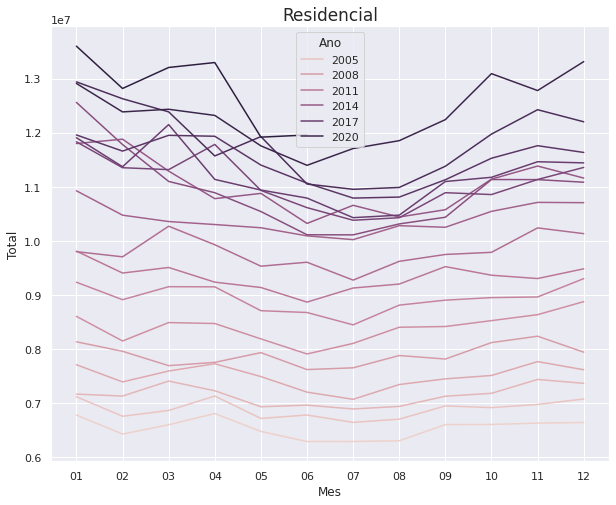

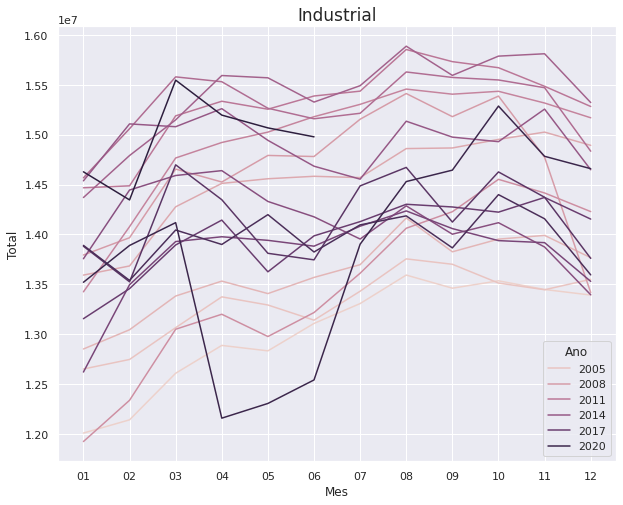

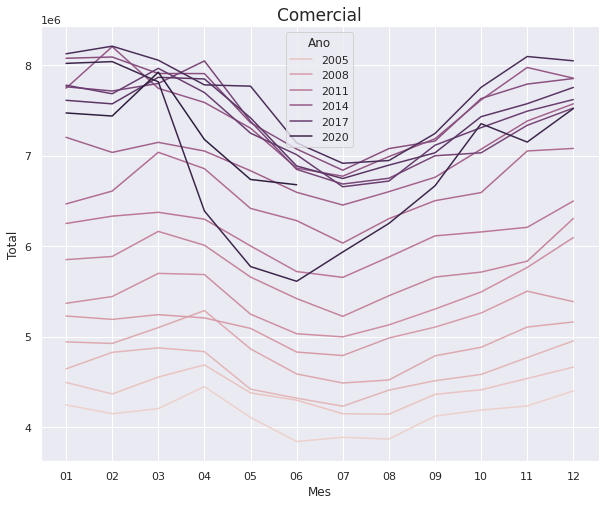

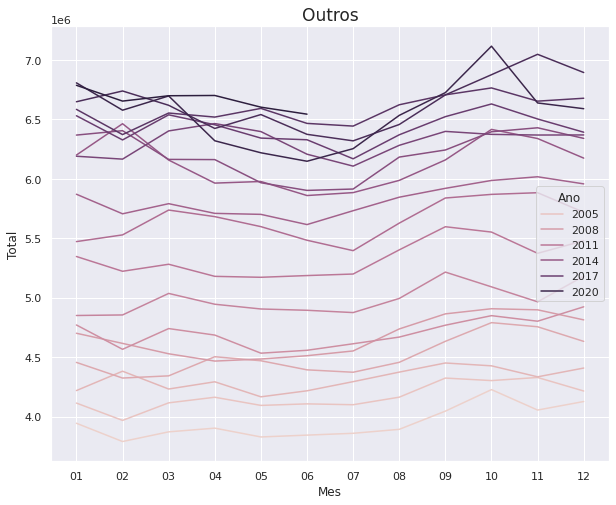

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for e, i in enumerate(lista_setor): 
    plt.figure(figsize=(10,8))
    sns.lineplot(data = dfEPE.reset_index().query(f'Setor == "{i}"'),x = 'Mes', y = 'Total', hue = 'Ano' )
    plt.title(i, fontsize = 17)

In [10]:
dfEPE.to_csv('/tmp/ResenhaEPE.csv', index=False)

In [11]:
dfEPE[(dfEPE.Ano == 2020) & (dfEPE.Mes == '01')]

,Ano,Mes,Total,Norte,Nordeste,Sudeste,Sul,CentoOeste,Ano Mês,Setor
1,2020,01,1.290851e+07,799553.99,2590818.60,6159440.55,2.244223e+06,1114472.03,2020-01,Residencial
1,2020,01,1.352021e+07,1268202.02,1823641.05,7075127.61,2.562807e+06,790429.29,2020-01,Industrial
1,2020,01,8.019492e+06,422928.21,1283465.06,4229303.52,1.453344e+06,630451.27,2020-01,Comercial
1,2020,01,6.806526e+06,399562.67,1424041.57,2693630.50,1.656269e+06,633022.49,2020-01,Outros


In [19]:
dfEPE['Data'] = dfEPE['Ano Mês']+'-01'

In [21]:
dfEPE['Data'] = dfEPE['Data'].astype("datetime64")

In [25]:
dfdeco = dfEPE[['Data','Total']].groupby('Data').sum()

In [39]:
dfdeco = dfdeco[dfdeco.index.year > 2010] 

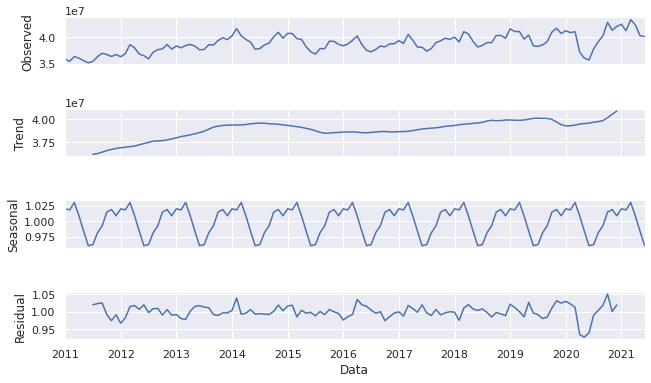

In [40]:
decomposicao = seasonal_decompose(dfdeco, model='multiplicative')
sns.set_theme()
style.use(DefStyle)
ax = decomposicao.plot()   
plt.gcf().set_size_inches(DefSize)

plt.show();

In [43]:
dfdeco

,Total
Data,
2011-01-01,3.587374e+07
2011-02-01,3.544492e+07
2011-03-01,3.635069e+07
2011-04-01,3.604832e+07
2011-05-01,3.556599e+07
...,...
2021-02-01,4.125269e+07
2021-03-01,4.337094e+07
2021-04-01,4.237015e+07


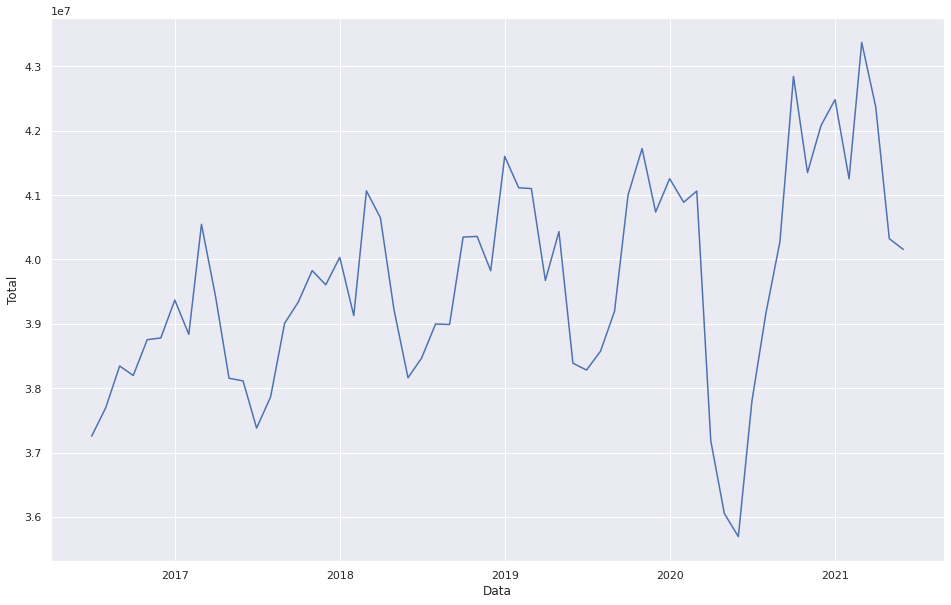

In [47]:
plt.figure(figsize=(16,10))
sns.set_theme()
sns.lineplot(data = dfdeco.reset_index()[-60:], x= dfdeco.reset_index().Data[-60:],y= 'Total')#, hue=ibcbr.index.year)